In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind

df = pd.read_excel("Leetcode.xlsx")
df['Pass/Fail'] = df['Pass/Fail'].replace('Pass', 1).replace('Fail', 0)
pass_rate = df.groupby(['LLM', 'Type(Tree, Array, etc)'])['Pass/Fail'].mean().reset_index()
pass_rate.columns = ['LLM', 'Type(Tree, Array, etc)', 'Pass/Fail']
pass_rate = pass_rate.pivot(index='LLM', columns='Type(Tree, Array, etc)', values='Pass/Fail').dropna(axis=1)

pass_rate1 = df.groupby(['LLM', 'Difficulty'])['Pass/Fail'].mean().reset_index()
pass_rate1.columns = ['LLM', 'Difficulty', 'Pass/Fail']
pass_rate1 = pass_rate1.pivot(index='LLM', columns='Difficulty', values='Pass/Fail').dropna(axis=1)


def g(pivot_df, title, xl):
    print('mean')
    print(pivot_df.mean(axis=1))
    print('var')
    print(pivot_df.var(axis=1))
    row_labels = pivot_df.index.tolist()
    
    num_categories = pivot_df.shape[1]
    bar_width = 0.4
    bar_padding = 0.1
    width = (bar_width + bar_padding)
    
    x = np.arange(num_categories)
    
    fig, ax = plt.subplots()
    ax.bar(x - width/2, pivot_df.loc['GPT4'], bar_width, label='GPT4', color='orange')
    for i in range(len(x - width/2)):
        plt.text(i-0.1, pivot_df.loc['GPT4'][i], str(pivot_df.loc['GPT4'][i])[:4], ha='right')
    ax.bar(x + width/2, pivot_df.loc['gemini'], bar_width, label='gemini', color='lightblue')
    for i in range(len(x + width/2)):
        plt.text(i+0.1, pivot_df.loc['gemini'][i], str(pivot_df.loc['gemini'][i])[:4], ha='left')

    
    ax.set_xlabel(xl)
    ax.set_ylabel('Pass rate')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(pivot_df.columns, rotation=45, ha='right')
    ax.legend()
    plt.savefig(title, bbox_inches='tight')
    
    plt.show()

    t_stat, p_value = ttest_ind(pivot_df.loc['GPT4'], pivot_df.loc['gemini'])
    print(p_value)


mean
LLM
GPT4      0.966667
gemini    0.643506
dtype: float64
var
LLM
GPT4      0.006667
gemini    0.119617
dtype: float64


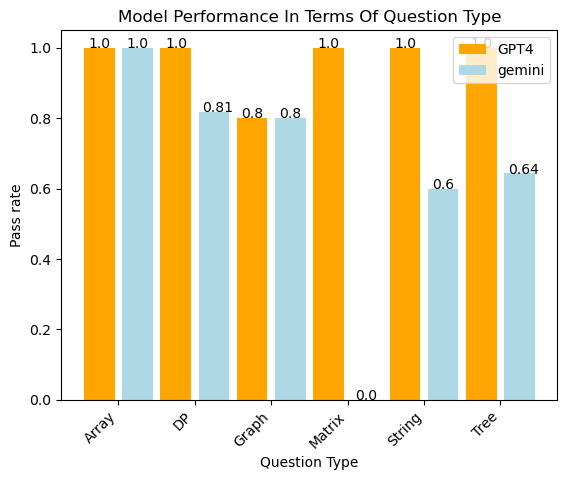

0.050052969903137165


In [44]:
g(pass_rate, 'Model Performance In Terms Of Question Type', 'Question Type')

mean
LLM
GPT4      0.991453
gemini    0.595377
dtype: float64
var
LLM
GPT4      0.000219
gemini    0.091976
dtype: float64


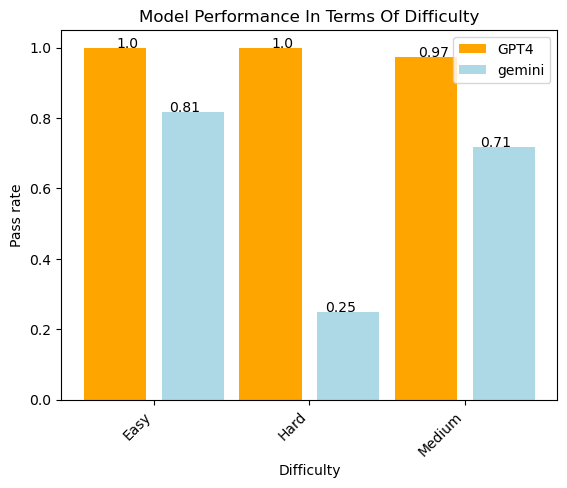

0.08674139182107746


In [45]:
g(pass_rate1, 'Model Performance In Terms Of Difficulty', 'Difficulty')